In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("dataset.csv")

In [3]:
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
data.shape

(100000, 35)

In [5]:
data.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

In [6]:
data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [7]:
data1=data.dropna(how="any",axis=0)
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [8]:
data1["classification"].value_counts()

benign     50000
malware    50000
Name: classification, dtype: int64

In [9]:
data1['classification'] = data1.classification.map({'benign':0, 'malware':1})

In [10]:
data1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [11]:
data1.tail()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99999,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,999,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


C:\Users\salon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


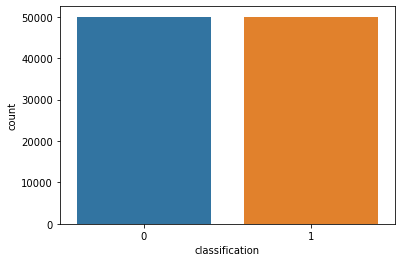

In [12]:
sns.countplot(data1["classification"])
plt.show()

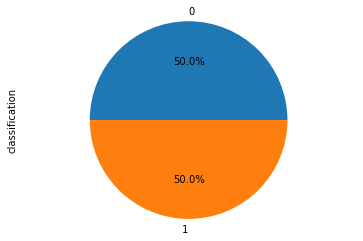

In [13]:
data1["classification"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [14]:
benign1=data.loc[data['classification']=='benign']
benign1["classification"].head()

1000    benign
1001    benign
1002    benign
1003    benign
1004    benign
Name: classification, dtype: object

In [15]:
malware1=data.loc[data['classification']=='malware']
malware1["classification"].head()

0    malware
1    malware
2    malware
3    malware
4    malware
Name: classification, dtype: object

In [16]:
corr=data1.corr()
corr.nlargest(35,'classification')["classification"]

classification       1.000000e+00
prio                 1.100359e-01
last_interval        6.952036e-03
min_flt              3.069595e-03
millisecond          5.482134e-15
gtime               -1.441608e-02
stime               -4.203713e-02
free_area_cache     -5.123678e-02
total_vm            -5.929110e-02
state               -6.470178e-02
mm_users            -9.364091e-02
reserved_vm         -1.186078e-01
fs_excl_counter     -1.378830e-01
nivcsw              -1.437912e-01
exec_vm             -2.551234e-01
map_count           -2.712274e-01
static_prio         -3.179406e-01
end_data            -3.249535e-01
maj_flt             -3.249535e-01
shared_vm           -3.249535e-01
vm_truncate_count   -3.548607e-01
utime               -3.699309e-01
nvcsw               -3.868893e-01
Name: classification, dtype: float64

In [17]:
x=data1.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
x.head()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,task_size,cached_hole_size,...,end_data,last_interval,nivcsw,min_flt,fs_excl_counter,lock,stime,gtime,cgtime,signal_nvcsw
0,0,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
1,1,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
2,2,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
3,3,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0
4,4,0,0,3069378560,14274,0,0,0,0,0,...,120,3473,0,0,0,3204448256,4,0,0,0


In [18]:
y=data1["classification"]
y

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: classification, Length: 100000, dtype: int64

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [21]:
pred=model.predict(x_test)
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [22]:
model.score(x_test,y_test)

0.6274

In [23]:
result=pd.DataFrame({
    "Actual_Value":y_test,
    "Predict_Value":pred
})

In [24]:
result

,Actual_Value,Predict_Value
43660,0,1
87278,1,1
14317,0,1
81932,1,1
95321,1,1
...,...,...
994,1,1
42287,0,1
4967,0,1
47725,0,0


In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier

In [26]:
clf4 = RandomForestClassifier(max_depth=5, random_state=0).fit(x_train, y_train)
y_pred4 = clf4.predict(x_test)
acc_rmf_model=roc_auc_score(y_test, y_pred4)*100
acc_rmf_model

97.21435793731041

In [27]:
lr = LogisticRegression(C = 0.2)
clf1 = lr.fit(x_train, y_train)
y_pred1 = clf1.predict(x_test)
acc_log_reg=roc_auc_score(y_test, y_pred1)*100
acc_log_reg

50.0

In [28]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Score': [acc_log_reg, acc_rmf_model]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
97.214358,Random Forest
50.000000,Logistic Regression
